In [34]:
# If deepinv cannot be found, change this to add your deepinv path
import sys
sys.path.append("/home/zhhu/workspaces/deepinv/")

In [41]:
import torch

import deepinv as dinv
from deepinv.utils.plotting import plot
from deepinv.optim.phase_retrieval import correct_global_phase, generate_signal, spectral_methods, cosine_similarity

In [36]:
device = dinv.utils.get_freer_gpu() if torch.cuda.is_available() else "cpu"
device

Selected GPU 3 with 32491 MiB free memory 


device(type='cuda', index=3)

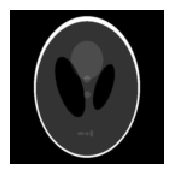

In [37]:
# Generate signal
x = generate_signal(
        shape = (1, 128, 128),
        mode = ['unit','shepp-logan'],
        phase_range=(-torch.pi/2, torch.pi/2),
        dtype=torch.complex64,
        device=device,
    )

plot(x.angle())

In [38]:
# Create model and generate measurements
physics = dinv.physics.StructuredRandomPhaseRetrieval(
    input_shape=(1, 128, 128),
    output_shape=(1, 222, 222),
    n_layers=2,
    transforms=['fourier2', 'fourier2'],
    diagonals=[['marchenko','uniform'],['unit','uniform']],
    device=device,
)

y = physics(x)

y.shape

torch.Size([1, 1, 222, 222])

In [39]:
# Reconstruct signal
x_est = spectral_methods(y, physics, n_iter=1000)

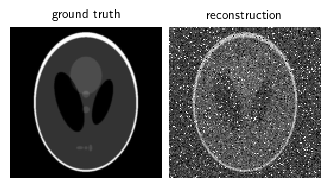

reconstruction accuracy: 0.7633


In [42]:
# Compare ground truth and reconstucted signal
x_est = correct_global_phase(x_est, x)
plot([x.angle(),x_est.angle()],['ground truth','reconstruction'])
print(f'reconstruction accuracy: {cosine_similarity(x, x_est).item():.4f}')